# Double check synthetically generated training images 

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
from PIL import Image

In [3]:
synth_dir = os.path.join('..', 'data', 'synthesized')
all_targets = np.load(os.path.join(synth_dir, 'targets.npy'), allow_pickle=True)[()]

#all_targets

### Choose random image and plot

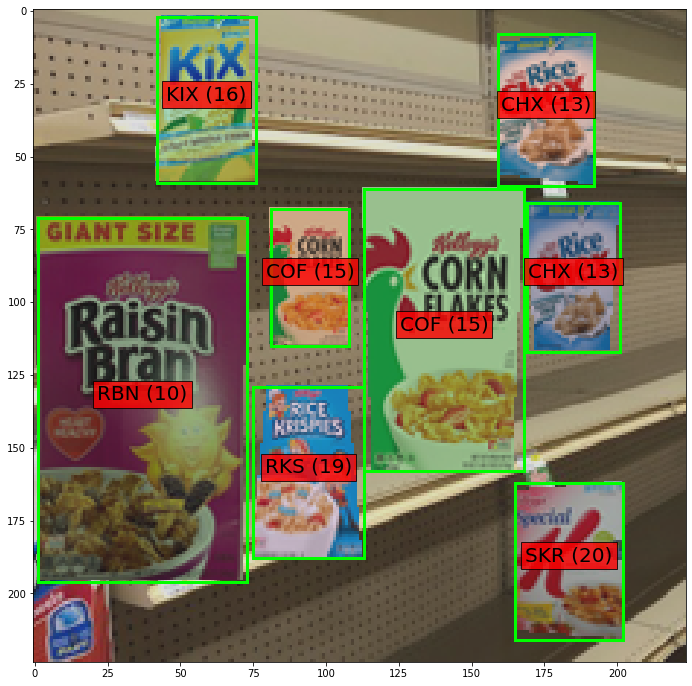

In [4]:
imgs =  list(sorted(os.listdir(os.path.join(synth_dir, 'PNG'))))
# get index
idx = np.random.randint(0, len(imgs))
# load image
img_name = imgs[idx]
img = Image.open(os.path.join(synth_dir, 'PNG', img_name))
# get target data
boxes = all_targets[img_name]

# plot
fig, ax = plt.subplots(1, figsize=(12,12))
ax.imshow(np.array(img));

for box in boxes:
    label_name = box['class_name']
    label_id = box['class_id']
    coords = box['bbox']
    
    rect = patches.Rectangle((coords[0], coords[1]), coords[2]-coords[0], coords[3]-coords[1], linewidth=3, edgecolor='lime',facecolor='none')
    ax.add_patch(rect);
    plt.text(np.mean([coords[0], coords[2]]), np.mean([coords[1], coords[3]]), f'{label_name} ({str(label_id)})', fontsize=20, bbox=dict(facecolor='red', alpha=0.8), horizontalalignment='center')